# Image IO
## Load NIFTI file
This example shows how to use tipl::io::nifti to load a nifti file and visualize one axial slice.

In [4]:
#include "TIPL/tipl.hpp" // git clone http://github.com/frankyeh/TIPL/
using namespace tipl;

In [5]:
io::nifti nii;
if(!nii.load_from_file("data/mni_icbm152_t1.nii"))
    return;
nii

sizeof_hdr=348
ndim_info=0
dim[0]=3
dim[1]=193
dim[2]=229
dim[3]=193
dim[4]=1
dim[5]=1
dim[6]=1
dim[7]=1
intent_p1=0
intent_p2=0
intent_p3=0
intent_code=0
datatype=2
bitpix=8
slice_start=0
pixdim[0]=3
pixdim[1]=1
pixdim[2]=1
pixdim[3]=1
pixdim[4]=1
pixdim[5]=1
pixdim[6]=1
pixdim[7]=1
vox_offset=352
scl_slope=1
scl_inter=0
slice_end=0
slice_code=0
xyzt_units=0
scl_inter=0
cal_max=0
cal_min=0
slice_duration=0
toffset=0
descrip=
aux_file=
qform_code=0
sform_code=1
quatern_b=0
quatern_c=1
quatern_d=0
qoffset_x=0
qoffset_y=0
qoffset_z=0
srow_x[0]=1
srow_x[1]=0
srow_x[2]=0
srow_x[3]=-96
srow_y[0]=0
srow_y[1]=1
srow_y[2]=0
srow_y[3]=-132
srow_z[0]=0
srow_z[1]=0
srow_z[2]=1
srow_z[3]=-78
intent_name=


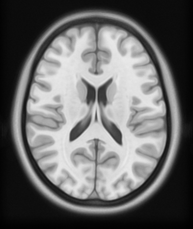

In [6]:
image<float,3> I;
nii >> I;
I

In [7]:
#include <stdio.h>
#include <dirent.h>
#include <sys/types.h>

In [11]:
std::vector<std::string> dicom_file_list;
DIR *dir = opendir("data/");
struct dirent *entry;
while ((entry = readdir(dir))) 
    dicom_file_list.push_back(entry->d_name);
closedir(dir);